In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [2]:
df=pd.read_csv("Black Friday Sales.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# checking null values

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Dropping the irrelevant columns

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
399491,1001465,P0096542,M,51-55,16,B,4+,1,3,4,12,10909


In [12]:
df.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [13]:
df.sample(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
524012,M,51-55,7,C,1,1,11,16,0,6113
274141,F,46-50,20,C,2,1,8,14,0,10036
176069,M,26-35,20,C,4+,0,1,11,15,11375
500319,M,26-35,16,A,0,0,1,11,15,19189
235600,M,55+,7,C,2,0,8,0,0,7879


# Handling The Special Character if present 

In [14]:
df['Age']=(df['Age'].str.strip('+'))

In [15]:
df.sample()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
206384,M,18-25,4,B,1,0,1,14,16,19687


In [16]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [17]:
df.sample(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
364554,M,0-17,1,C,3.0,0,1,0,0,15245
39683,M,36-45,17,C,4.0,0,1,2,9,15444
19267,M,18-25,4,A,3.0,0,5,0,0,7078
87173,M,18-25,4,A,0.0,0,17,0,0,7981
418130,M,51-55,3,C,1.0,1,8,0,0,6009


# Unique elements in each attributes

In [18]:
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Data Visualization wrt to purchace

<AxesSubplot:ylabel='Purchase'>

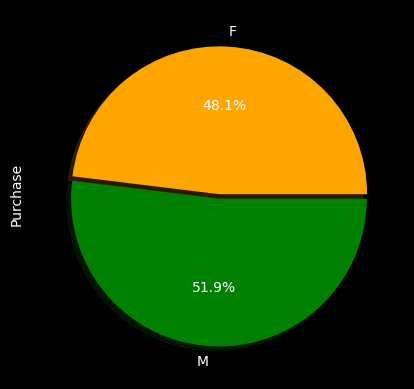

In [19]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct="%1.1f%%",shadow=True,explode=[0, 0.03],colors=['orange','g'])


In [20]:
df.groupby('Gender').mean()['Purchase']

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

# Marital_Status wrt to Purchase

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

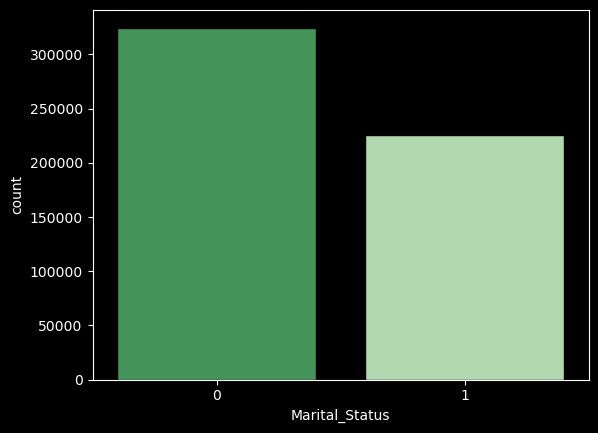

In [21]:
sns.countplot(df['Marital_Status'],palette='Greens_r',edgecolor='black')

# Marital_Status wrt  to Purchase

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

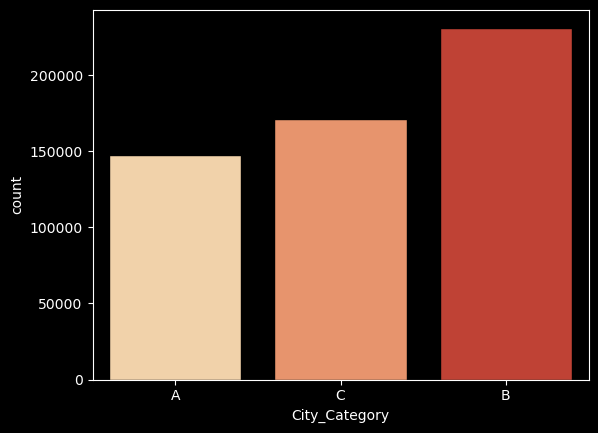

In [22]:
sns.countplot(df['City_Category'],palette='OrRd',edgecolor='black')

# Purchase Distribution 

<Figure size 2500x2000 with 0 Axes>

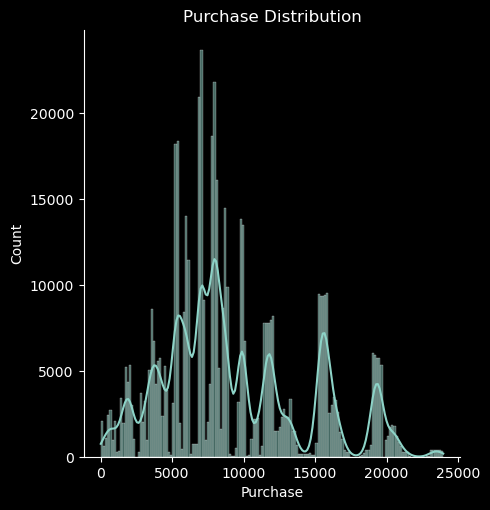

In [23]:
plt.figure(figsize=(25,20))
sns.displot(data=df,x='Purchase',kde=True,fill=True)
plt.title("Purchase Distribution")
plt.show()

# Age wrt to purchase

In [24]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55       9336.280459
Name: Purchase, dtype: float64

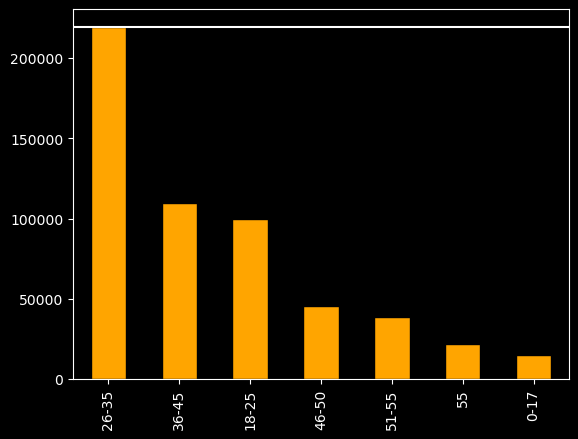

In [25]:
df['Age'].value_counts().plot(kind='bar',color='Orange',edgecolor='black')
plt.axhline(219587)

In [26]:
df[['Age']].value_counts()

Age  
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55        21504
0-17      15102
dtype: int64

# Stay_In_Current_City_Years wrt Purchase

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

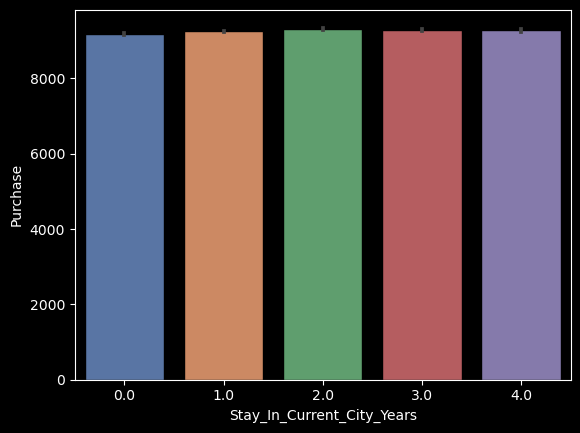

In [27]:
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',palette='deep',edgecolor='black')

In [28]:
df[['Stay_In_Current_City_Years']].value_counts()

Stay_In_Current_City_Years
1.0                           193821
2.0                           101838
3.0                            95285
4.0                            84726
0.0                            74398
dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

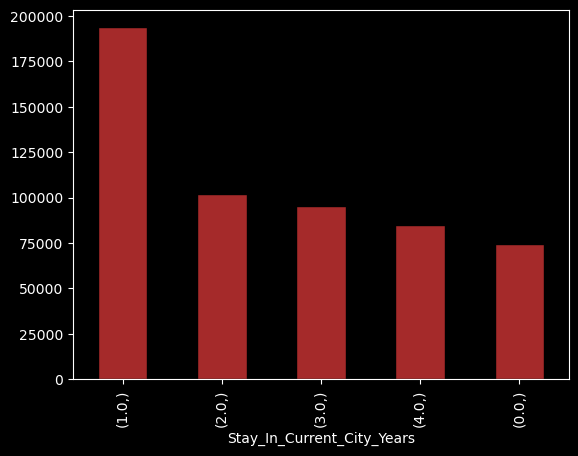

In [29]:
df[['Stay_In_Current_City_Years']].value_counts().plot(kind='bar',color='brown',edgecolor='black')

# Product_Category_1

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


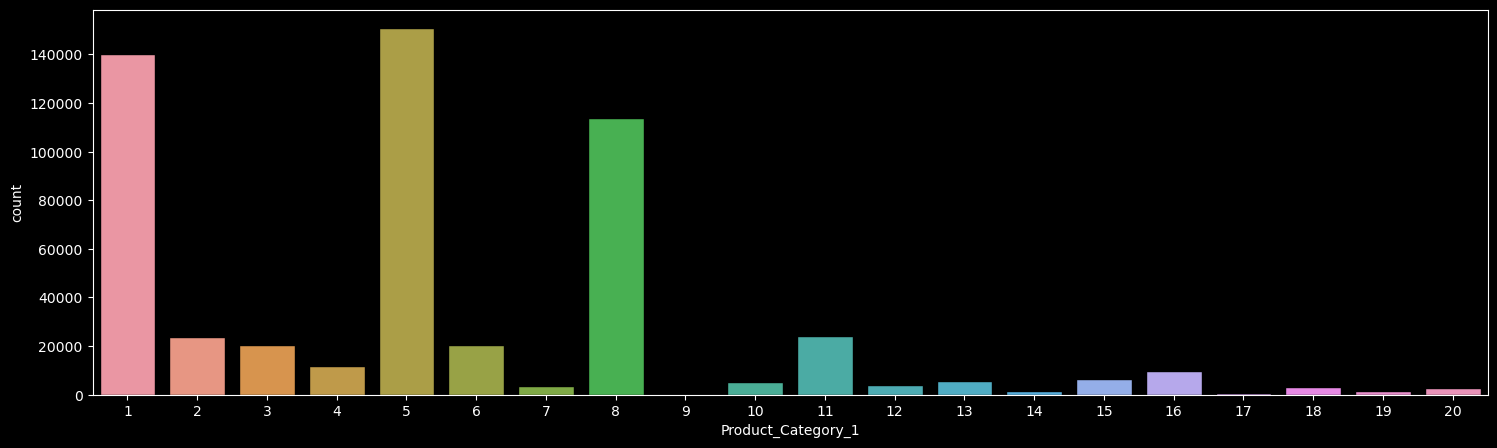

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'],edgecolor='black')
plt.show()


/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


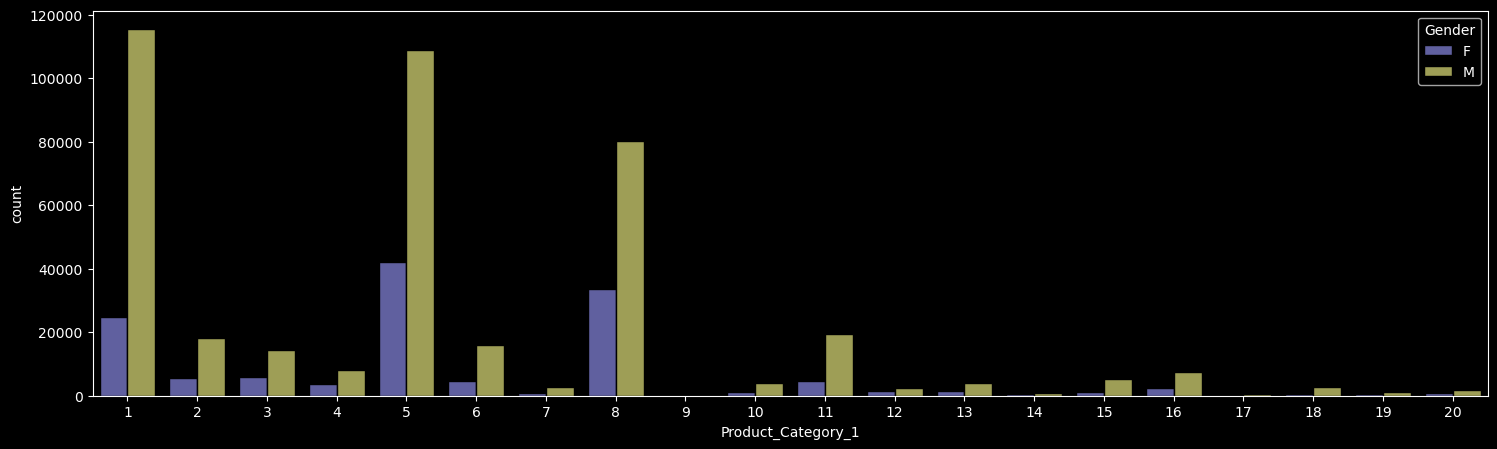

In [31]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'],hue=df['Gender'],palette='gist_stern',edgecolor='black')
plt.show()

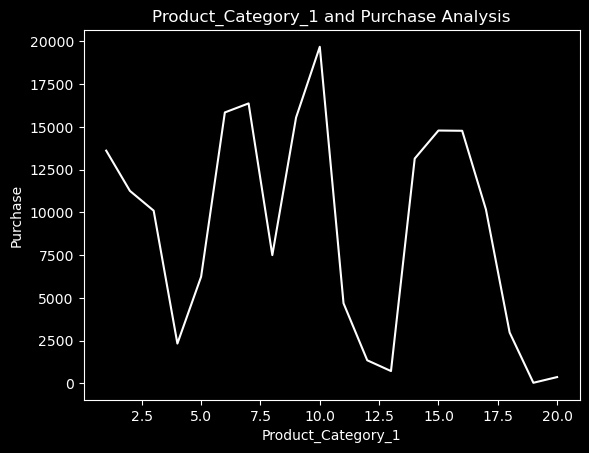

In [32]:
sns.lineplot(data=df.groupby('Product_Category_1').mean()['Purchase'],color='white')
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

# Product_Category_2

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


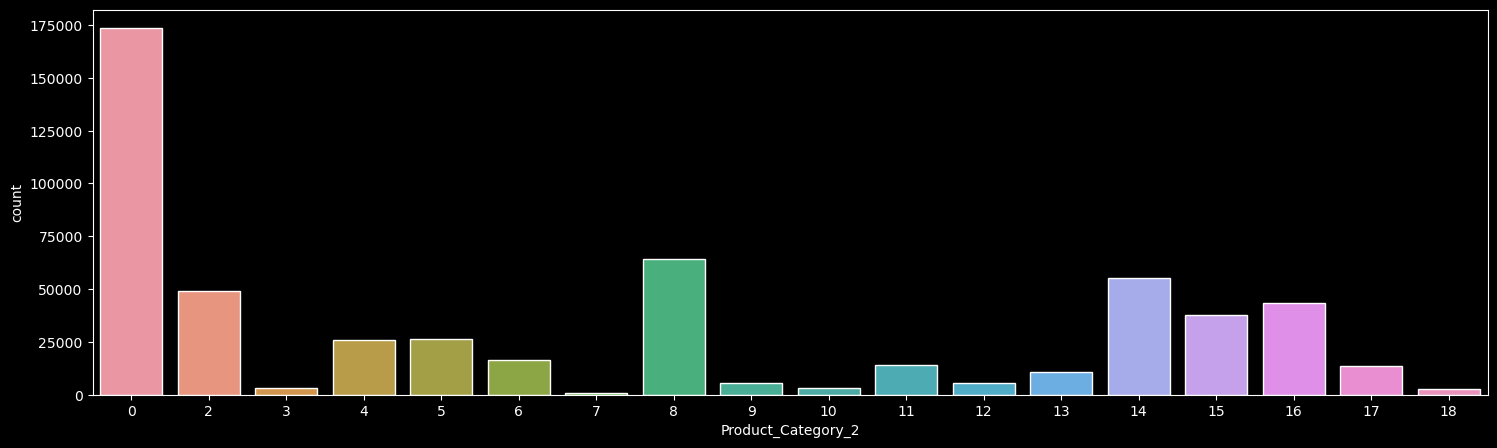

In [33]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'],edgecolor='w')
plt.show()


/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


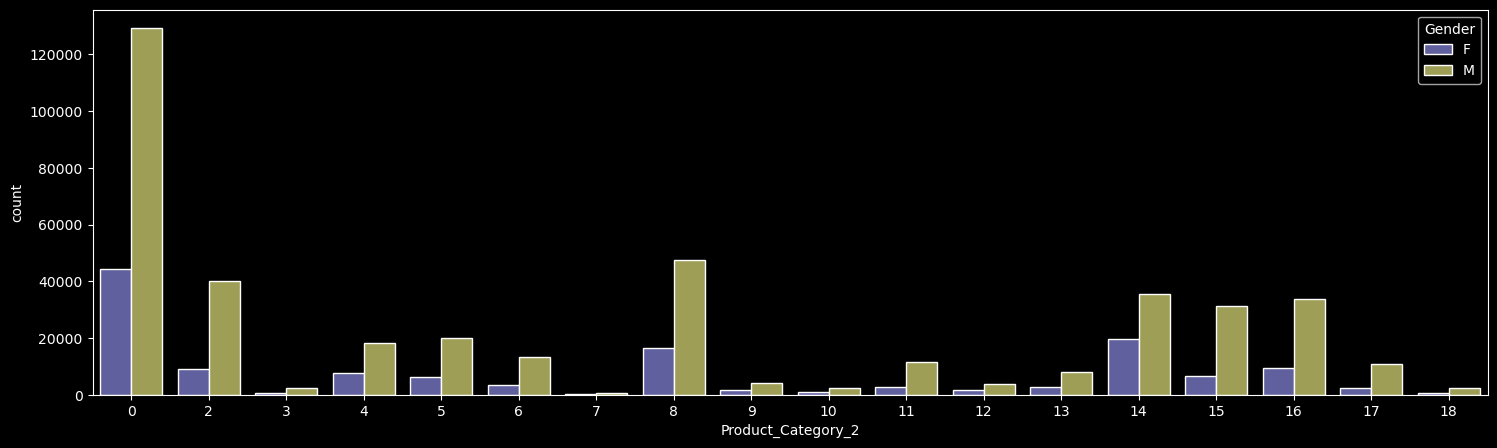

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'],hue=df['Gender'],palette='gist_stern',edgecolor='w')
plt.show()

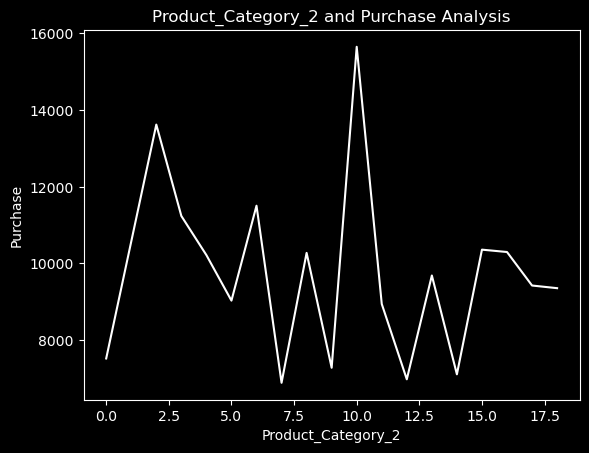

In [35]:
sns.lineplot(data=df.groupby('Product_Category_2').mean()['Purchase'],color='white')
plt.title("Product_Category_2 and Purchase Analysis")
plt.show()

# Product_Category_3

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


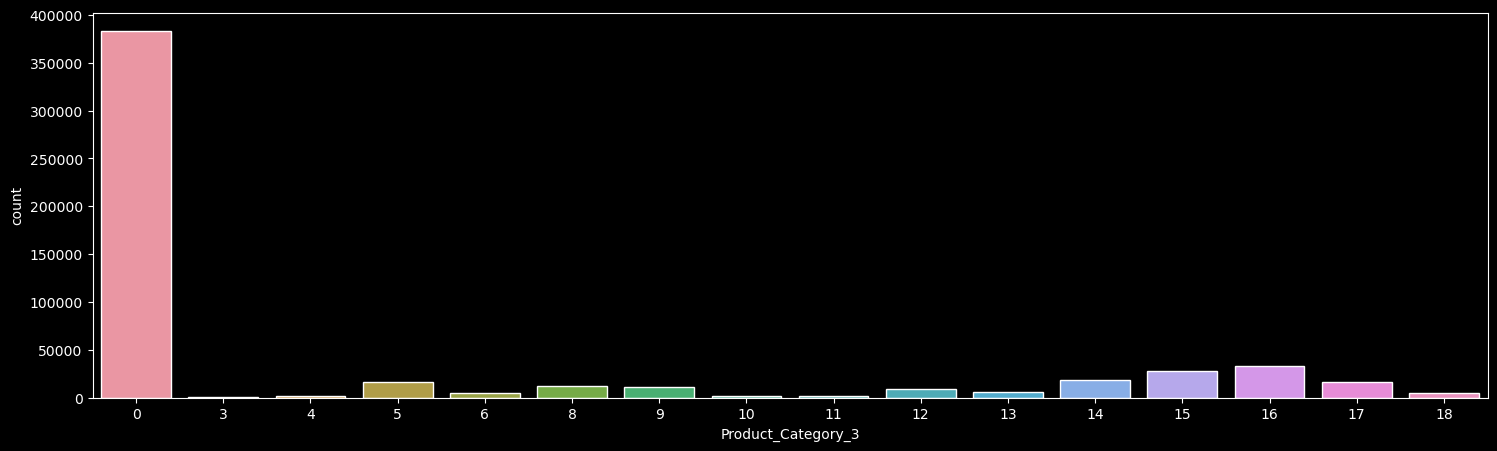

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'],edgecolor='w')
plt.show()


/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


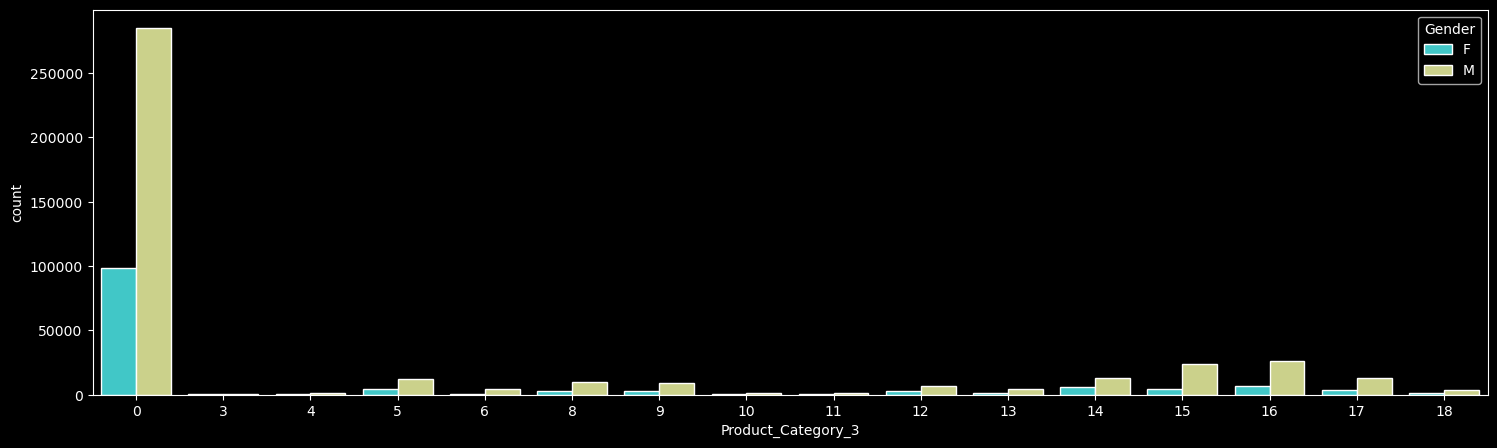

In [37]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'],hue=df['Gender'],palette='rainbow',edgecolor='w')
plt.show()

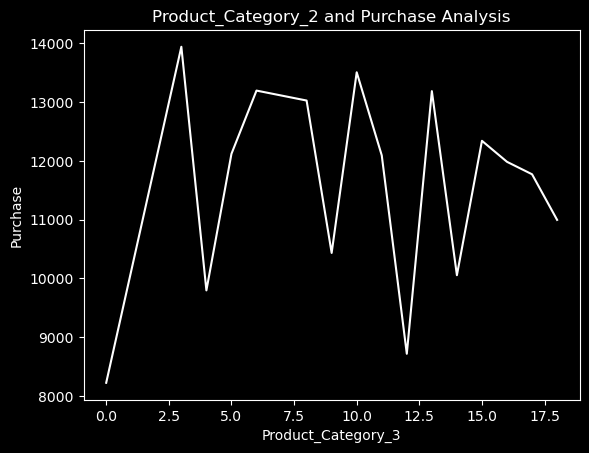

In [38]:
sns.lineplot(data=df.groupby('Product_Category_3').mean()['Purchase'],color='white')
plt.title("Product_Category_2 and Purchase Analysis")
plt.show()

# City_Category and Gender wrt Putchase 

<AxesSubplot:xlabel='City_Category,Gender'>

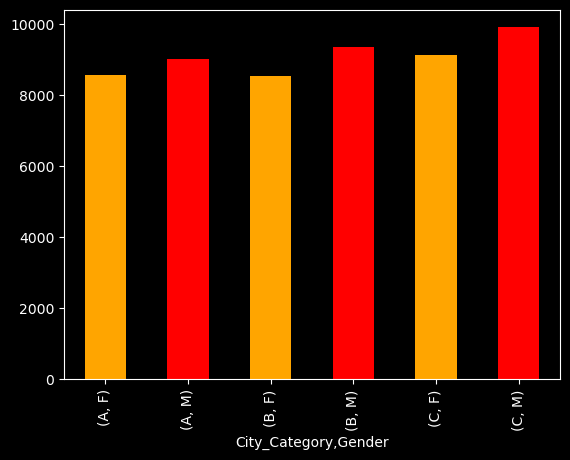

In [39]:
df.groupby(['City_Category','Gender']).mean()['Purchase'].plot(kind='bar',color=['orange','r'])

# City_Category count

In [40]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:ylabel='City_Category'>

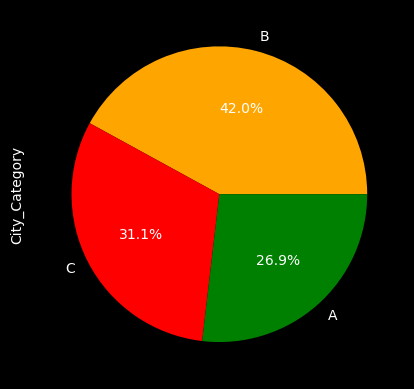

In [41]:
df['City_Category'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=['orange','red','green'])

# Treatment of outlier

/Users/akshay27dubeyicloud.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


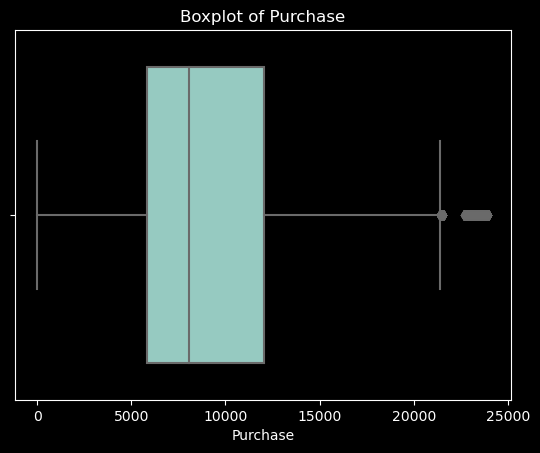

In [42]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

# Checking Distribution Of Data

In [43]:
df.skew()

/var/folders/yh/kwv_l61x6gj40vq2hlsvp8dw0000gn/T/ipykernel_2640/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category_1            1.025735
Product_Category_2            0.310021
Product_Category_3            1.184926
Purchase                      0.600140
dtype: float64

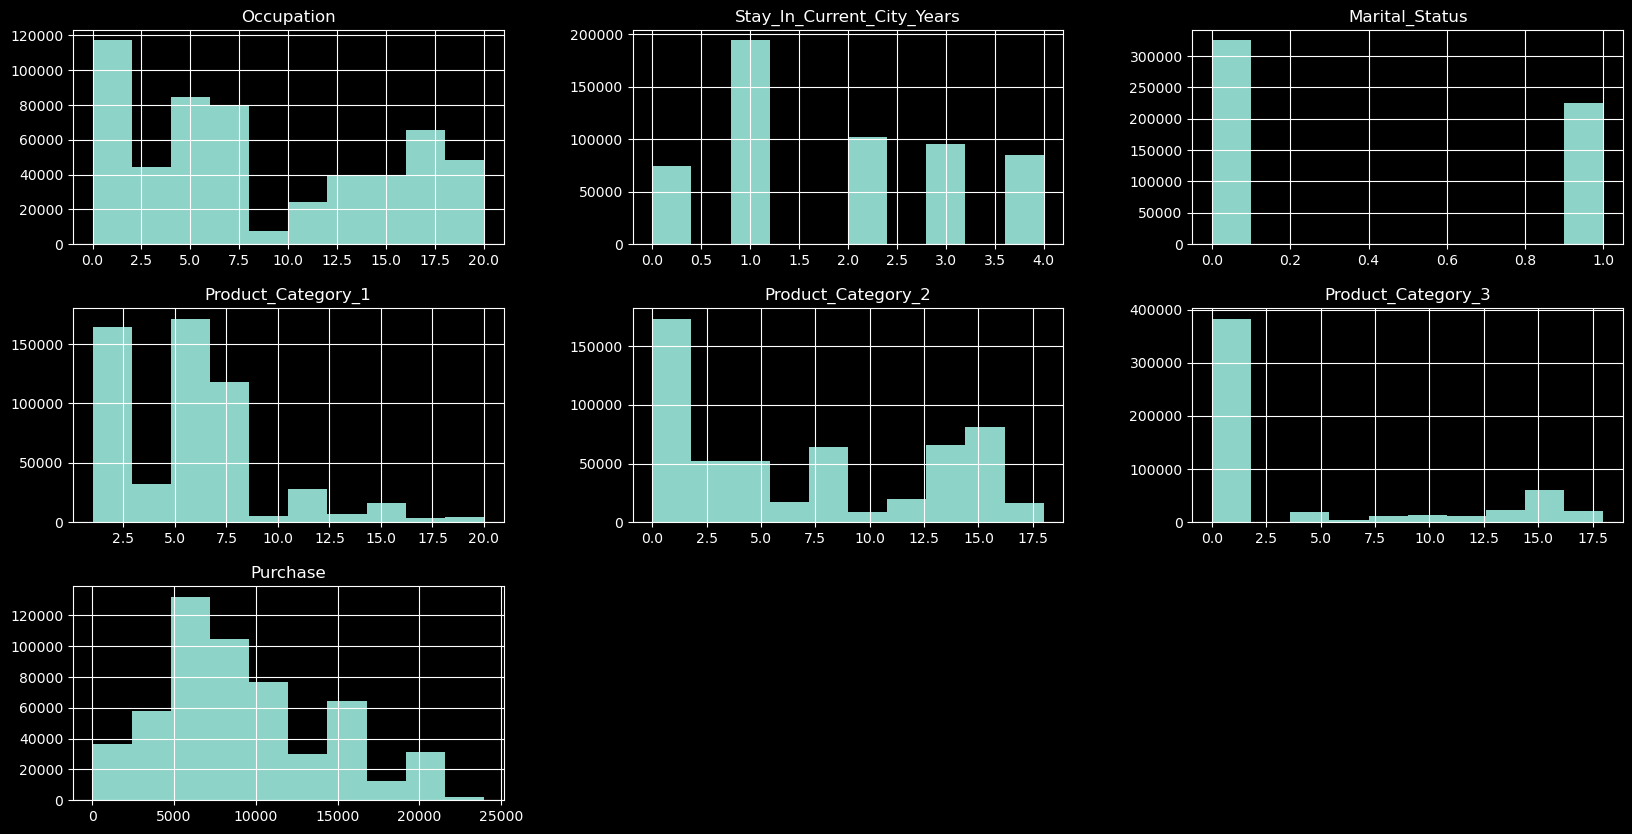

In [44]:
df.hist(figsize=(20,10))
plt.show()

# Visualize the correlation matrix between the features in the dataset using a heatmap.

<AxesSubplot:>

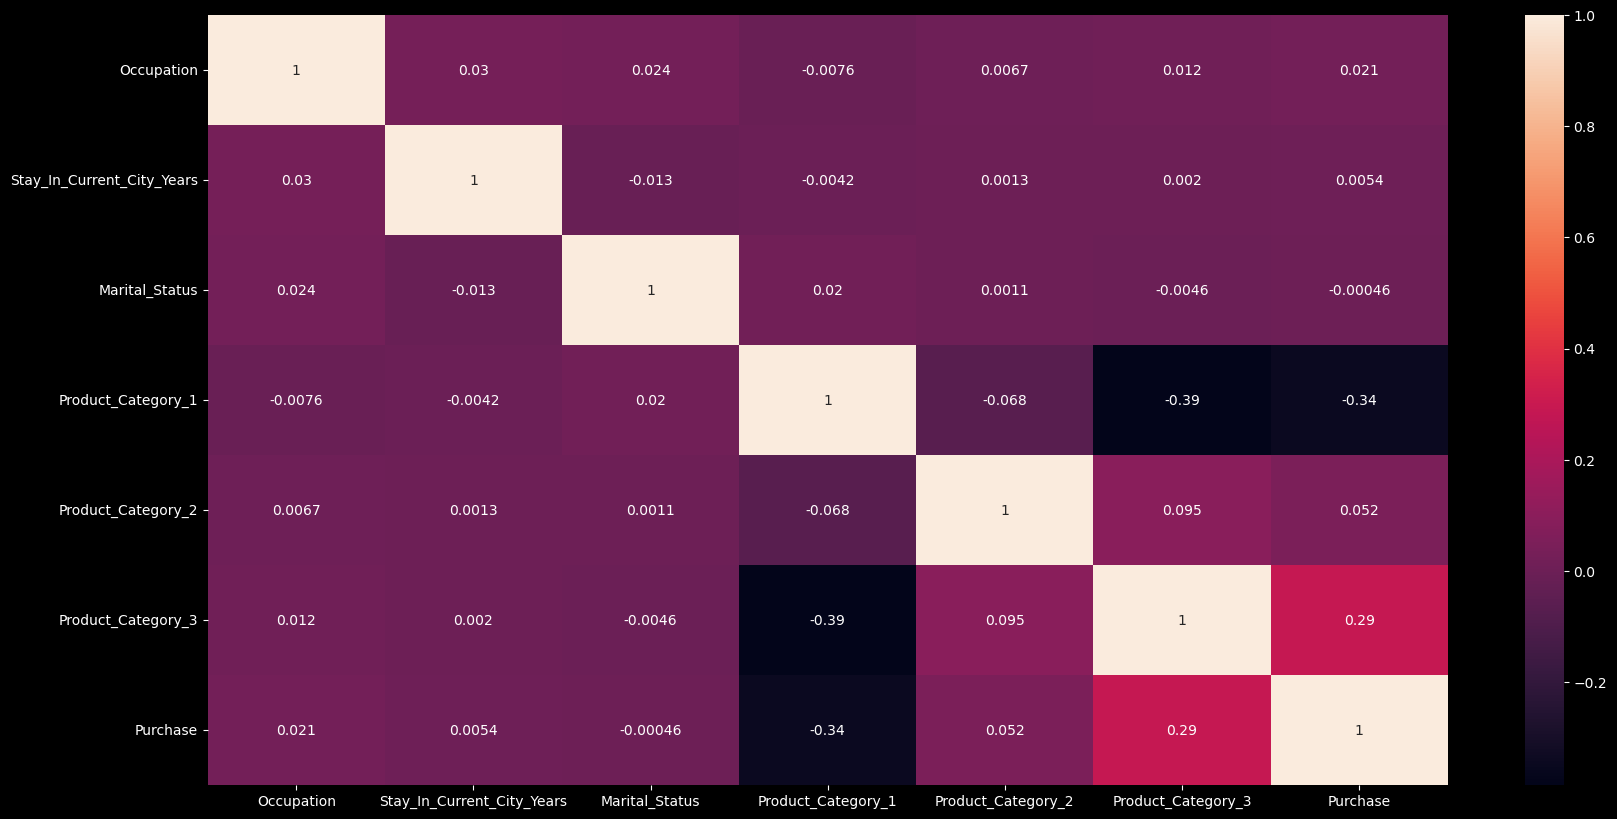

In [45]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(),annot=True)

# Convert Categorical variable into Numerical 

In [46]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
LE=LabelEncoder()

In [49]:
df['Gender'] = LE.fit_transform(df['Gender'])

In [50]:
df['City_Category'] = LE.fit_transform(df['City_Category'])

In [51]:
df['Marital_Status'] = LE.fit_transform(df['Marital_Status'])

In [52]:
df.sample(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
109510,1,36-45,0,2,3.0,1,5,8,0,5414
518491,1,26-35,19,1,3.0,0,11,0,0,7375
406727,1,26-35,3,1,4.0,0,2,3,4,10091
527658,1,36-45,17,1,2.0,1,5,8,17,3586
261302,1,51-55,7,1,1.0,0,8,0,0,7988


# Convert Data into Guassian form

In [53]:
df.drop('Age',axis=1,inplace=True)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:

SS=StandardScaler()

In [56]:
df[['Stay_In_Current_City_Years','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]=SS.fit_transform(df[['Stay_In_Current_City_Years','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']])

In [57]:
from sklearn.preprocessing import PowerTransformer

In [58]:
PT=PowerTransformer()

In [59]:
df[['Stay_In_Current_City_Years','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]=PT.fit_transform(df[['Stay_In_Current_City_Years','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']])

In [60]:
df.sample(5)

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
278285,0,1.596191,2,-0.621166,1,0.091133,0.351956,1.602916,-0.336530
472306,1,1.497917,2,1.526703,0,-1.337766,-0.727937,-0.655187,1.248740
444159,1,-1.402255,1,-1.606587,0,2.309534,-1.155225,-0.655187,-1.179157
305674,1,-1.178248,2,1.526703,0,-1.337766,0.351956,1.575297,1.728206
413952,1,0.719391,2,0.919764,0,-1.337766,-0.146151,-0.655187,1.221599


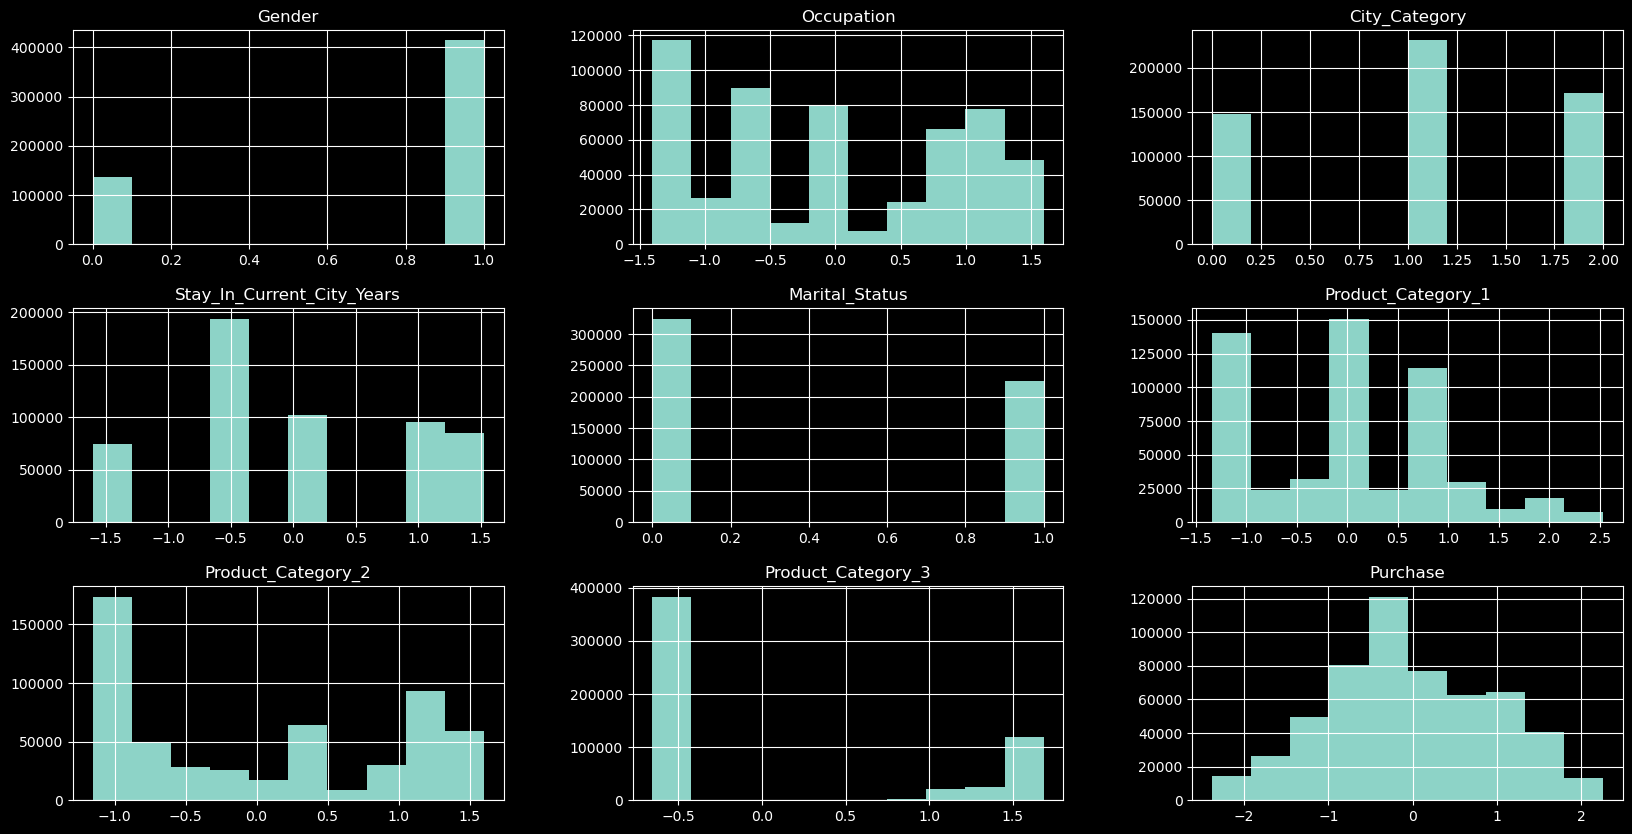

In [61]:
df.hist(figsize=(20,10))
plt.show()

# Splitting data into independent and dependent variables

In [62]:
X = df.drop("Purchase",axis=1).values

In [63]:
y=df['Purchase'].values

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [66]:
X_train.shape

(385047, 8)

In [67]:
X_test.shape

(165021, 8)

# Modeling

# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
LR= LinearRegression()

In [70]:
LR.fit(X_train,y_train)

LinearRegression()

In [71]:
LR.intercept_

-0.1182163808387352

In [72]:
y_pred=LR.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [74]:
mean_absolute_error(y_test, y_pred)

0.6880779713866362

In [75]:
mean_squared_error(y_test, y_pred)

0.7998191142104069

In [76]:
r2_score(y_test, y_pred)

0.20234383880684204

In [77]:
LR.score(X_train,y_train)

0.20330248096230585

In [78]:
LR.score(X_test,y_test)

0.20234383880684204

# Decision Tree Regression

In [79]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
DTR= DecisionTreeRegressor(random_state = 2)  


In [80]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [81]:
y_pred1=DTR.predict(X_test)

In [82]:
mean_absolute_error(y_test, y_pred1)

0.47084584183951855

In [83]:
mean_squared_error(y_test, y_pred1)

0.401503841160928

In [84]:
r2_score(y_test, y_pred1)

0.5995819467744271

# KNN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
KNNR=KNeighborsRegressor(  n_neighbors=6)

In [87]:
KNNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [88]:
y_pred2=KNNR.predict(X_test)

In [89]:
r2_score(y_test, y_pred2)

0.569194298275261

# Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
RFR=RandomForestRegressor(random_state = 0)

In [92]:
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [93]:
y_pred3=KNNR.predict(X_test)

In [94]:
r2_score(y_test, y_pred3)

0.569194298275261

# XGBoost Regressor

In [95]:
from xgboost.sklearn import XGBRegressor

In [96]:
xgb_reg = XGBRegressor()


In [97]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
xgb_y_pred = xgb_reg.predict(X_test)

In [99]:
r2_score(y_test, xgb_y_pred)

0.6730864282908776

# Lasso Regression

In [100]:
from sklearn.linear_model import Lasso, Ridge

In [101]:
l1=Lasso( alpha=0.01)

In [102]:
l1.fit(X_train, y_train)

Lasso(alpha=0.01)

In [103]:
l1_pred = l1.predict(X_test)

In [104]:
r2_score(y_test, l1_pred)

0.20155945641506146

In [105]:
train_score_ls =l1.score(X_train,y_train)
test_score_ls =l1.score(X_test,y_test)

In [106]:
train_score_ls

0.20230750308664947

In [107]:
print(test_score_ls)

0.20155945641506146


# Ridge Regression

In [108]:
l2=Ridge()

In [109]:
l2.fit(X_train, y_train)

Ridge()

In [110]:
l2_pred = l2.predict(X_test)

In [111]:
r2_score(y_test, l2_pred)

0.20234384364595415

In [112]:
train_score_ls =l2.score(X_train,y_train)
test_score_ls =l2.score(X_test,y_test)

In [113]:
train_score_ls

0.2033024809611712

In [114]:
test_score_ls

0.20234384364595415

# Tuning XGBoost Hyperparameters

In [115]:
from xgboost.sklearn import XGBRegressor

In [116]:
xgb_reg = XGBRegressor()


In [117]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
xgb = xgb_reg.predict(X_test)

In [119]:
r2_score(y_test, xgb_y_pred)

0.6730864282908776

In [120]:
train_score_xgb =xgb_reg.score(X_train,y_train)
test_score_xgb =xgb_reg.score(X_test,y_test)

In [121]:
train_score_xgb

0.6793309577951065

In [122]:
test_score_xgb

0.6730864282908776

In [123]:
 from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = {'learning_rate': [0.1,0.5,0.8,],
              'max_depth': [ 8, 7, 10],
              'n_estimators': [100, 200,90]}


In [125]:
xgb = XGBRegressor()


In [126]:
grid_search = GridSearchCV(xgb, param_grid, cv=5)


In [127]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [128]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
0.6688726284812052


In [ ]:
The best score we can obtain  with the XGBoost Regressor is 0.6730  from 0.6628